<a href="https://colab.research.google.com/github/Naduli48/Telco_customer_churn_prediction/blob/main/Telco_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to display plots
import seaborn as sns #for create plots

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#number of columns and rows
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
#Since the total charges column is categorical, it needs to be changed to a numerical format.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
 #errors = 'coerce' argumebt tells pandas to replace any string that cannot be concerted to a number with NaN.

In [43]:
df['TotalCharges'].fillna(0, inplace=True)
# The rows that are NaN are the customers with tenure of 0(new customers) who haven't accumulated charges yet. Fill NaN s with 0.

/tmp/ipython-input-1427632260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [47]:
#customer ID has no predictive value
df.drop('customerID', axis=1, inplace=True)

KeyError: "['customerID'] not found in axis"

In [48]:
#Replace 'no' with specific terms, such as 'no internet service,' etc.
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in service_cols:
  df[col] = df[col].replace('No internet service','No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [50]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
#Display churn count and Churn percentage
churn_count = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True)*100

print("Churn count : \n",churn_count)
print("\nchurn_percentage : \n",churn_percentage)

Churn count : 
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

churn_percentage : 
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [54]:
#dupliacte rows
df.duplicated().sum()

np.int64(22)

In [62]:
print(f"Original number of rows: {len(df)}")

# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True)

print(f"Number of rows after removing duplicates: {len(df)}")

Original number of rows: 7043
Number of rows after removing duplicates: 7021


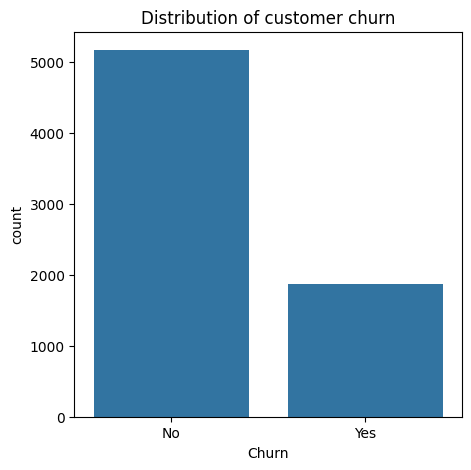

In [56]:
#Visualization
plt.figure(figsize=(5,5))
sns.countplot(x = "Churn", data= df)
plt.title("Distribution of customer churn")
plt.show()

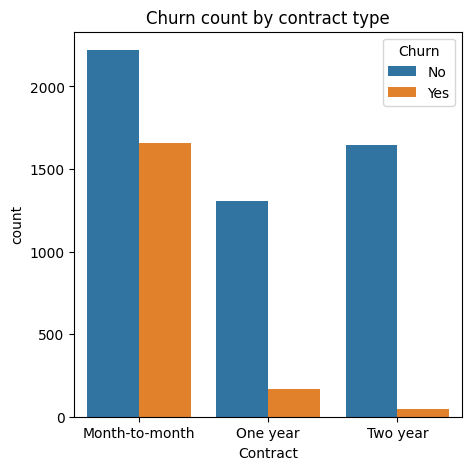

In [57]:
#Churn according to contract type
plt.figure(figsize=(5,5))
sns.countplot(x = "Contract", hue = "Churn", data= df)
plt.title("Churn count by contract type")
plt.show()

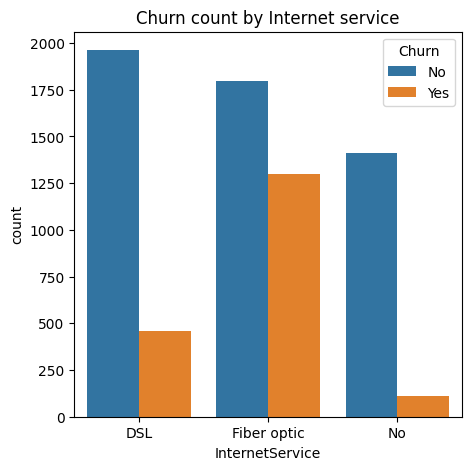

In [58]:
#Churn according to internet service
plt.figure(figsize=(5,5))
sns.countplot(x = "InternetService", hue = "Churn", data= df)
plt.title("Churn count by Internet service")
plt.show()

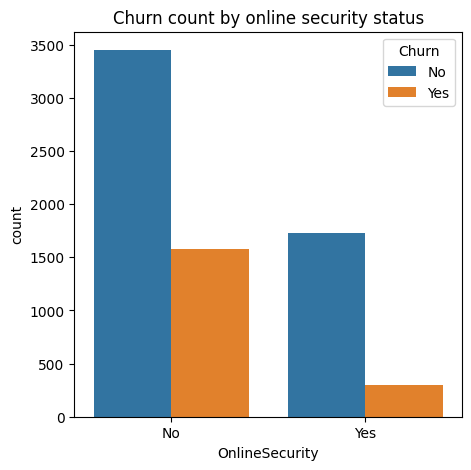

In [59]:
#Churn according to online security
plt.figure(figsize=(5,5))
sns.countplot(x = "OnlineSecurity", hue = "Churn", data= df)
plt.title("Churn count by online security status")
plt.show()

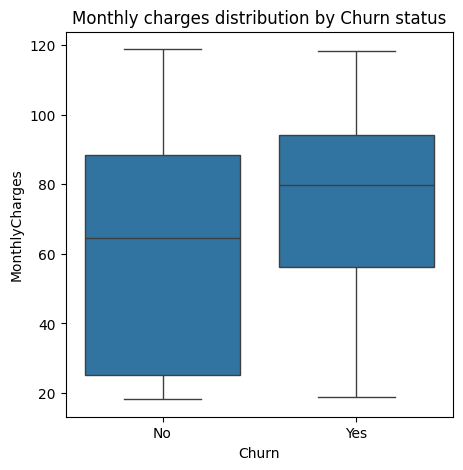

In [60]:
#Churn according to online security
plt.figure(figsize=(5,5))
sns.boxplot(x = "Churn", y = "MonthlyCharges", data= df)
plt.title("Monthly charges distribution by Churn status")
plt.show()

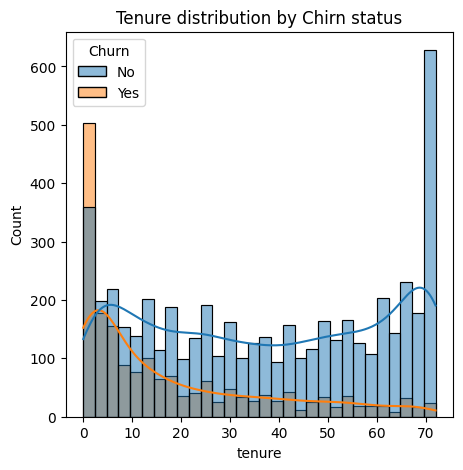

In [61]:
#Tenure (duration of the customer)
plt.figure(figsize=(5,5))
sns.histplot(x = "tenure", hue = "Churn", data= df,  kde = True, bins = 30)
plt.title("Tenure distribution by Chirn status")
plt.show()

In [64]:
#convert yes/ no to 1/0 for correlato matrix
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

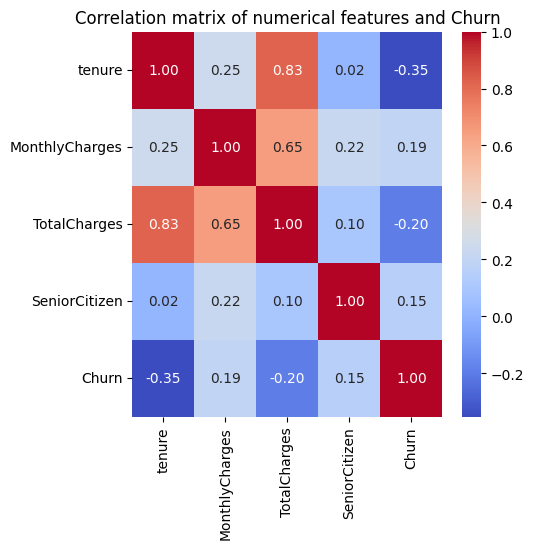

In [65]:
from typing import ChainMap
#correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Churn']].corr(),annot = True, cmap = 'coolwarm',fmt=".2f")
plt.title('Correlation matrix of numerical features and Churn')
plt.show()

In [67]:
#Outlier detection(IQR method)
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 +1.5 *IQR

  df[col] = np.where(df[col]>upper_bound, upper_bound,df[col])
print("Outlier capping applied to:", numerical_cols)

Outlier capping applied to: ['tenure', 'MonthlyCharges', 'TotalCharges']
